In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math

In [2]:
pip install riskfolio-lib

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("data/adjprice.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.head()

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN


In [4]:
StartDate = "2010/08/21"
EndDate = "2019/07/05"

In [5]:
stocks = data[(data["Date"] >= StartDate) & (data["Date"] <= EndDate)]
stocks.dropna(axis=1,inplace=True)

<ipython-input-5-98a5d6b13910>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks.dropna(axis=1,inplace=True)


In [6]:
stocks.tail()

,Date,A US Equity,AA US Equity,AAP US Equity,AAPL US Equity,ABC US Equity,ABMD US Equity,ABT US Equity,ACN US Equity,ADBE US Equity,...,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZBH US Equity,ZION US Equity
9428,2019-07-01,75.78,22.92,156.59,201.55,85.59,265.02,84.1748,186.87,300.97,...,59.43,57.59,121.15,76.56,58.32,36.24,4.25,109.49,117.31,46.33
9429,2019-07-02,75.61,23.30,159.79,202.73,85.46,261.49,84.6331,188.60,301.39,...,60.15,57.59,117.60,75.72,58.19,35.64,3.93,110.90,116.73,44.85
9430,2019-07-03,76.80,22.70,160.63,204.41,87.59,261.33,85.3205,190.97,305.70,...,60.71,57.59,116.39,76.44,58.32,36.48,3.95,110.98,117.65,45.37
9431,2019-07-04,76.80,22.70,160.63,204.41,87.59,261.33,85.3205,190.97,305.70,...,60.71,57.59,116.39,76.44,58.32,36.48,3.95,110.98,117.65,45.37
9432,2019-07-05,75.75,23.13,160.62,204.23,87.97,261.47,85.1013,191.39,303.98,...,60.69,57.59,116.11,76.13,57.80,36.44,3.78,110.24,117.81,46.21


In [7]:
stock = ['Date','AMG US Equity','CCK US Equity','BLK US Equity','TEN US Equity','REGN US Equity']
stocks = stocks[stock]

In [8]:
psy= stocks.set_index('Date')
psy

,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
Date,,,,,
2010-08-21,67.3495,28.67,117.104,25.1551,22.93
2010-08-22,67.3495,28.67,117.104,25.1551,22.93
2010-08-23,66.2633,28.62,115.292,24.8552,22.41
2010-08-24,64.3083,28.13,113.874,23.6555,22.12
2010-08-25,64.2886,28.13,113.721,23.9360,22.47
...,...,...,...,...,...
2019-07-01,92.0200,62.07,472.930,10.9800,316.56
2019-07-02,90.1400,62.25,469.870,10.4500,315.53
2019-07-03,90.7300,63.09,475.350,10.3400,318.39


In [9]:
import riskfolio as rp

In [10]:

# Building the portfolio object

port = rp.Portfolio(returns=psy)

# calculating optimal portfolio
# Select method and estimate input parameters:

methmu = 'hist' #Method to estimate expected returns based on historical data
methcov= 'hist' #Method to estimate covariance matrix based on historical data

port.assets_stats(methmu=methmu,methcov=methcov, d=0.94)

#  Estimate the optimal portfolio
model = 'Classic' #Could be Classic(historical), BL OR FM
rm = 'MV'#Variance
obj = 'Sharpe' #Objective function could be MinRisk, MaxRet, Utility or Sharpe Ratio
hist = True
rf =  0 #rf=risk free rate
l= 0 # only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
yu = w.T
yu

,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
weights,0.003804,0.904393,1.843320e-09,0.091803,3.667402e-09


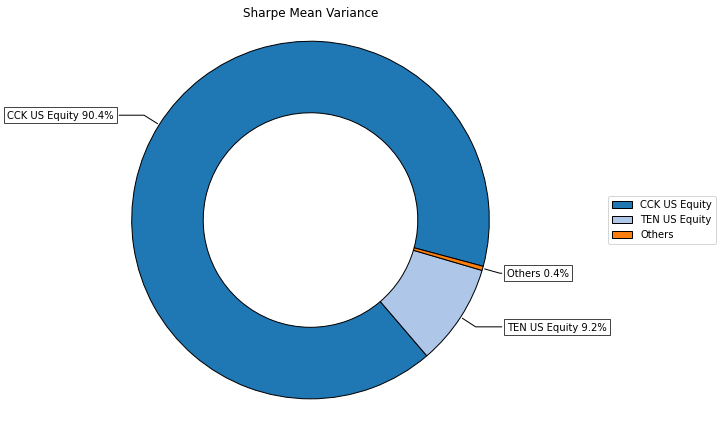

In [11]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title = 'Sharpe Mean Variance', others = 0.05, nrow=25, cmap = 'tab20',
                height=6, width = 10, ax = None)

In [12]:
points = 50
frontier = port.efficient_frontier(model=model,rm=rm,points = points, rf=rf, hist=hist)
yi= frontier.T
yi.head()

,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
0,1.443256e-10,0.881131,1.332265e-09,1.188691e-01,1.928800e-09
1,1.016287e-01,0.898371,5.354098e-10,3.996434e-10,8.165129e-10
2,1.818654e-01,0.818135,1.143962e-09,8.370125e-10,1.192151e-09
3,2.356288e-01,0.756441,7.930144e-03,2.079695e-09,1.188448e-09
4,2.818420e-01,0.699842,1.831644e-02,1.516558e-10,3.427563e-10


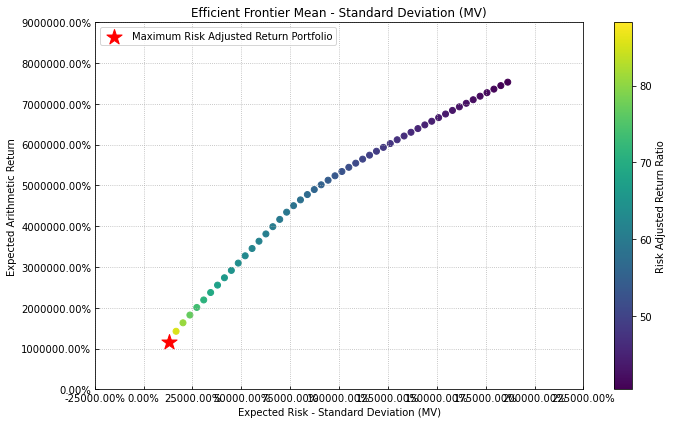

In [13]:
# plotting the efficient frontier

label = 'Maximum Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns


ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns,
                     rm=rm, rf=rf, alpha =0.05, cmap= 'viridis', w=w,
                     label=label, marker= '*', s=16, c='r', height=6,width=10,ax=None)

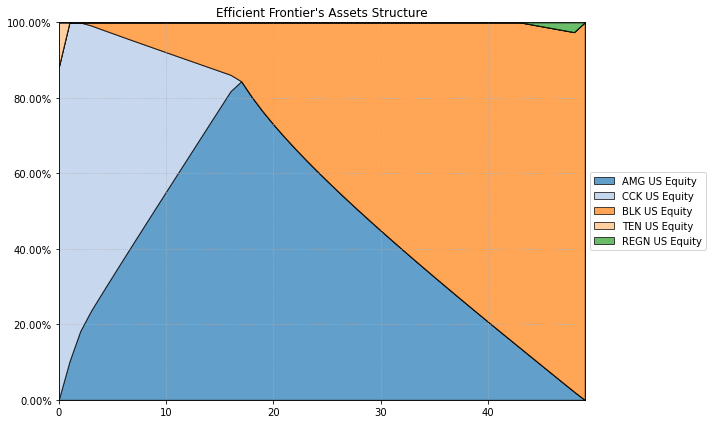

In [14]:
ax= rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height = 6,
                         width = 10, ax = None)